# **ASSIGNMENT 2 - EMPIRICAL STUDY OF CLASSIFICATION PROBLEM**

# 1. Group Description
Group Number:[add this later] <br>
Names: Natasha Hussain | Daanish Khan <br>
Student Numbers: 300122562 | 300126840 <br>

# 2. The Classification Problem
[WRITE A DESCRIPTION]

# 3. The Dataset
In this assignment, we used WineQT.csv from : https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
This dataset of wine samples has :
Number of samples: 4898, Number of attributes: 11, Number of classes: 11 (0 to 10)


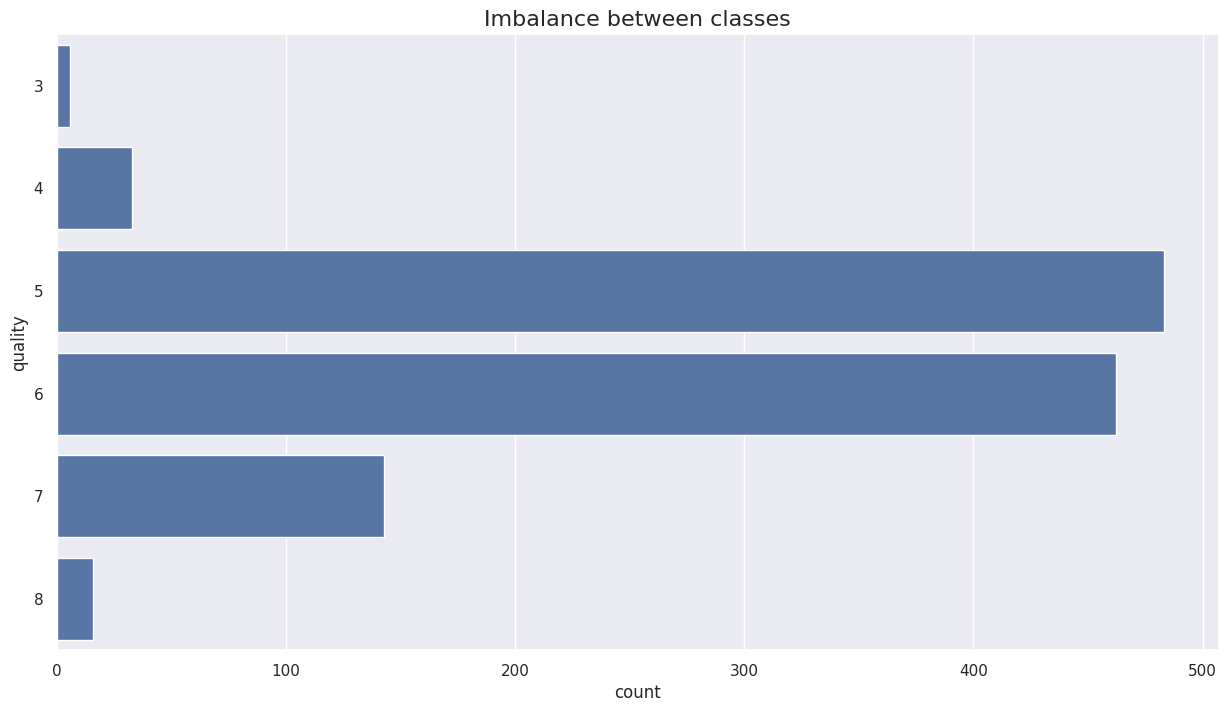

In [1]:
# Importing libraries we will use throughout the assignment
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
    precision_score, 
    recall_score
)

#importing the wine quality dataset
url = 'https://raw.githubusercontent.com/NatashaNaima/AI-NaiveBayes/main/WineQT.csv'
dataset = pd.read_csv(url)
dataset.drop('Id', axis=1)
dataset.columns
# a small set to reduce literal runtime while testing
small_set = dataset.head(10)

sns.pairplot(dataset, diag_kind = 'kde', hue = 'quality')

# Creating a plotting function to evaluate our samples taken from [2]
# Set plotting size and style
sns.set(rc = {'figure.figsize':(15, 8)})
sns.set_style("darkgrid")

# setting y, our dependent variable, to quality. And our independent variables to X.
X = dataset.drop(['quality', 'Id'], axis=1)
y = dataset['quality']

# plotting counts of different quality buckets
sns.countplot(y=y)
plt.title("Imbalance between classes", size=16)
plt.show()

[Remove this paragraph after final check][More Questions on the dataset that would use the arrays]
Think about the features that could be useful for this task, are they all present in the
dataset? Anything missing? Any feature provided that doesn’t seem useful to you?
Do you have the domain expertise to answer these questions? If you don't, think of
ways to explore the attributes to establish whether they appear to influence the
classification.

<br>
The most important feature provided in our dataset is the 'quality' column. It is in accordance with this feature that we will classify the entries of our dataset and evaluate 'new' entries to our dataset. We are also provided, alongside ID which differentiates each entry, many other quantative entries about particular physical properties of each wine. We are not wine tasters nor manufacterers nor any specialist or enthusiasts about wine, so we do not entirely understand the relevancy of each of these features. With this in mind however, by the end of this assignment we hope to establish some trends and therefore influences of each of these features as to how they affect wine quality.
<br>
[Remove this paragraph after final check] 
b. What are the ranges of each feature? Try to compare and visualize those ranges. We
discussed in class that attribute normalisation is often promoted as empirically
helping to improve performances. Do you think this would be useful for your study?

<br>
Quality : Ranges from 3 to 8 where each entry is a whole number <br>
Alcohol : Ranges from 8.4 to 14.9 where each entry is a percentage to 1 significant digit (ex.12.3%) <br>
Sulfates : Ranges from 0.33 to 2 where each entry is 2 significant digits (ex.1.23)<br>
pH : Ranges from 2.74 to 4.01 where each entry is 2 significant digits (ex.3.22)<br>
density : Ranges from 0.99 to 1 where each entry is at least 4 significant digits (ex.0.9902)<br>
total sulfur dioxide : Ranges from 6 to 289 where every entry is a whole number<br>
free sulfur : Ranges from 1 to 68 where each entry is a whole number<br>
chloride : Ranges from 0.01 to 0.61 where each entry is at least 2 significant digits (ex. 0.07)<br>
residual sugar : Ranges from 0.9 to 15.5 where each entry is 1 significant digit (ex 8.6)<br>
citric acid : Ranges from 0 to 1 where each entry has 2 significant digits ( ex 0.27)<br>
volatile acidity : Ranges from 0.12 to 1.58 where each entry has at least 2 significant digits<br>
fixed acidity : Ranges from 4.6 to 15.9 where each entry has 1 significant digits (ex. 9.6)<br>
<br>

As seen in the visualization of the data, we our distribution of the quality target feature is not uniform. In fact all of our features have more candidates represented in a particular range. Quality, while between 3 and 8 is mostly represented in the 5 to 6 range. This will likely present issues when we go to fit our features in our  Naive Bayes classifier. Our classifier will have more data on the average range, increasing the prior P(Quality = 5 or 6) and over fit predictions to this range, reducing precision outside of the average range and overall accuracy. To combat this, we could normalize our data to equilize our training fits before performing Naive Bayes Classification, however, we have a rather limited dataset (our smallest category, quality=8, has only 16 entries) we cannot under sample without extreme dataloss. Further, if we were to oversample, we would once again be overfitting to our training data resulting in no improvement on the precision or accuracy of our classification. 

<br>
On the other hand, logistical regression is very sensitive to imbalanced features as it is looking for a best fit. We chose to scale our data using z-score normalization before performing logistical regression to ensure convergence. While this will allow us to perform classification at all, it is still likely to overfit and classify on the average more than the outer range.


# 4. Encoding the features
[FILL IN] What is encoding, why is it useful.

## Encoding for Logistical Regression
Since all of our features are numbers on a continuous scale, we do not need to encode them.

## Encoding for Naive Bayes
We saw in class that this classifier expects discrete attributes, but in scikit-learn, there is GaussianNB which applies a Gaussian distribution on continuous attributes. This means that it is possible to calculate the priors and probabilities needed to perform naive bayes classification despite having continuous attributes. We will be using Gaussian Naive-Bayes in our model.

# 5. Defining Logistical Regression and Naive-Bayes Model

## Logistical Regression
[write some description]

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
def logistical_regression(x_train, x_test, y_train, y_test):
    # Scaling our data
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    # fitting model using our training data and the Gaussian Classifier
    model = LogisticRegression(random_state=16, max_iter=1000).fit(x_train, y_train)
    
    # Make prediction from model
    y_pred = model.predict(x_test)
    
    # calcualte accuracy and f1
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average="weighted")

    # calculating micro and macro precision/recall
    micro_precision = precision_score(y_test, y_pred, average="micro", zero_division=0)
    micro_recall = recall_score(y_test, y_pred, average="micro", zero_division=0)

    # calculating macro precision/recall 
    macro_precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
    macro_recall = recall_score(y_test, y_pred, average="macro", zero_division=0)
    
    evaluation = {'accuracy': accuracy, 'f1': f1, 'macro_p': macro_precision, 'macro_r':macro_recall, 'micro_p':micro_precision, 'micro_r': micro_recall}
    return model, y_pred, evaluation

Accuracy: 0.6695652173913044
F1 Score: 0.6934198136182096
Micro Precision: 0.6695652173913044
Micro Recall: 0.6695652173913044
Macro Precision: 0.3502645502645503
Macro Recall: 0.36772486772486773


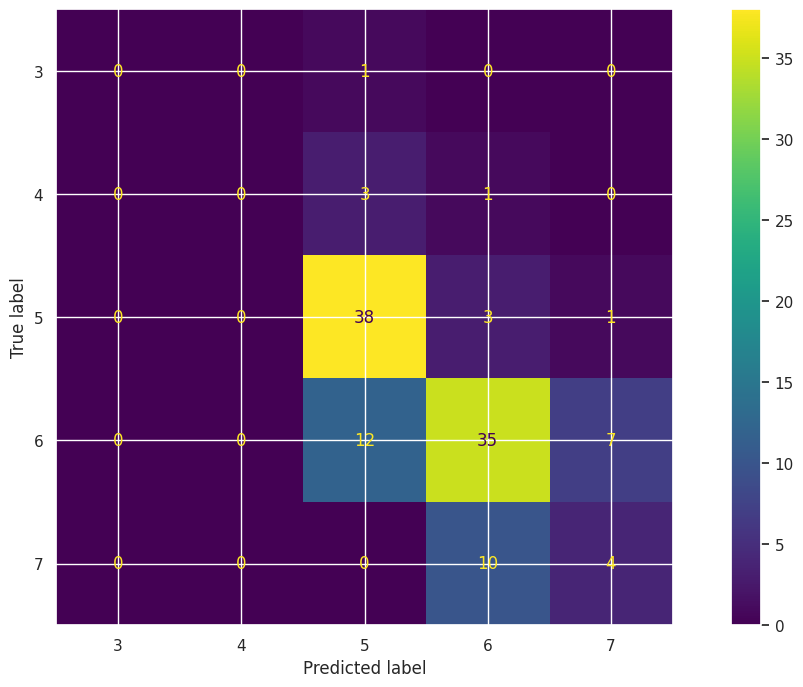

In [40]:
data = dataset.drop(['quality', 'Id'], axis=1)
target = dataset['quality']

# creating a our training and testing cohorts 
x_train, x_test, y_train, y_test = train_test_split(
    data, 
    target, 
    test_size = 0.1, 
    random_state = 125
)

model, y_pred, results = logistical_regression(x_train, x_test, y_train, y_test)

# print accuracy and f1
print("Accuracy:", results['accuracy'])
print("F1 Score:", results['f1'])

# Print micro-averaged precision and recall
print("Micro Precision:", results['micro_p'])
print("Micro Recall:", results['micro_r'])

# Print macro-averaged precision and recall
print("Macro Precision:", results['macro_p'])
print("Macro Recall:", results['macro_r'])

# create confusion matrix 
cm = confusion_matrix(y_test, y_pred)
# create labels from included classes between test set and predicted set
labels = list(set(np.unique(y_test)).union(np.unique(y_pred)))
# display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()


## Naive-Bayes
[Write some description]

In [51]:
from sklearn.naive_bayes import GaussianNB

def naive_bayes(X_train, X_test, y_train, y_test):
    # fitting model using our training data and the Gaussian Classifier
    model = GaussianNB().fit(X_train, y_train)
    
    # Make prediction from model
    y_pred = model.predict(X_test)

    # calcualte accuracy and f1
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average="weighted")

    # calculating micro and macro precision/recall
    micro_precision = precision_score(y_test, y_pred, average="micro", zero_division=0)
    micro_recall = recall_score(y_test, y_pred, average="micro", zero_division=0)

    # calculating macro precision/recall 
    macro_precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
    macro_recall = recall_score(y_test, y_pred, average="macro", zero_division=0)
    
    evaluation = {'accuracy': accuracy, 'f1': f1, 'macro_p': macro_precision, 'macro_r':macro_recall, 'micro_p':micro_precision, 'micro_r': micro_recall}
    return model, y_pred, evaluation

Accuracy: 0.5391304347826087
F1 Score: 0.5280600758861628
Micro Precision: 0.5391304347826087
Micro Recall: 0.5391304347826087
Macro Precision: 0.3034509350298824
Macro Recall: 0.29431216931216936


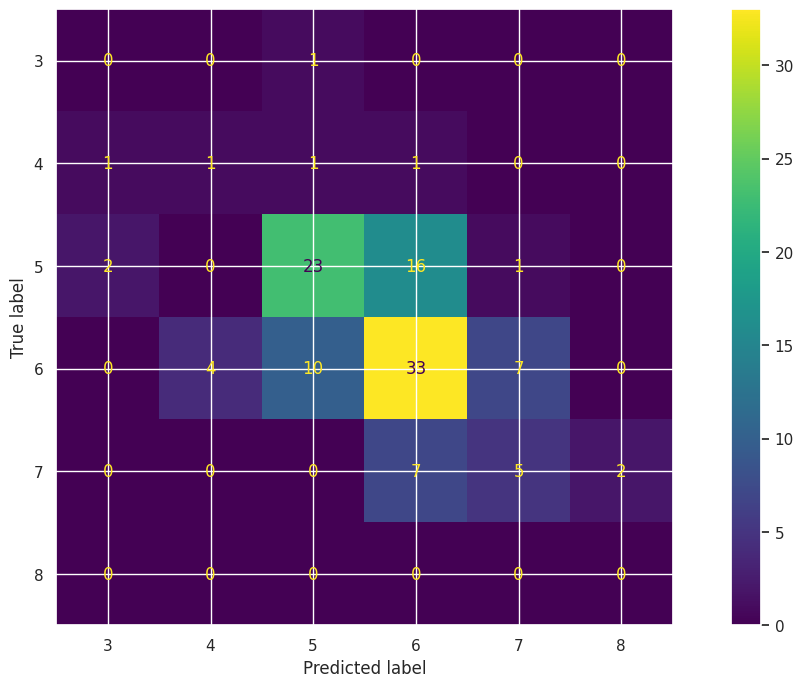

In [52]:
data = dataset.drop(['quality', 'Id'], axis=1)
target = dataset['quality']

# creating a our training and testing cohorts 
x_train, x_test, y_train, y_test = train_test_split(
    data, 
    target, 
    test_size = 0.1, 
    random_state = 125
)

model, y_pred, results = naive_bayes(x_train, x_test, y_train, y_test)

# print accuracy and f1
print("Accuracy:", results['accuracy'])
print("F1 Score:", results['f1'])

# Print micro-averaged precision and recall
print("Micro Precision:", results['micro_p'])
print("Micro Recall:", results['micro_r'])

# Print macro-averaged precision and recall
print("Macro Precision:", results['macro_p'])
print("Macro Recall:", results['macro_r'])

# create confusion matrix 
cm = confusion_matrix(y_test, y_pred)
# create labels from included classes between test set and predicted set
labels = list(set(np.unique(y_test)).union(np.unique(y_pred)))
# display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

# 6. Evaluating our Models

## 4-fold cross validation and precision/recall evaluation
We will use 4-fold cross validation to evaluate our models. [write short description of 4-fold cross]
[Perform an evaluation with precision/recall measures. Since you are looking at a multi-class problem, make sure that you compare micro and macro averages on precision and recall] [Make sure to note parameters used in here]

TODO : Turn this into a MD block and write descriptions on both these things. Then add some comments into the MD block following (idk if you want to include analysis in that one as well or if you would want to push the analysis part to the 'analysis' section. Up to you)

In [58]:
# Code Block for 4-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits = 4)
results_LR = []
results_NB = []


data = dataset.drop(['quality', 'Id'], axis=1)
target = dataset['quality']

for train_index, test_index in kf.split(dataset):
    x_train, x_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    
    # Call the naive_bayes function and store results in different variables
    _, _, resultsNB = naive_bayes(x_train, x_test, y_train, y_test)
    _, _, resultsLR = logistical_regression(x_train, x_test, y_train, y_test)
    results_LR.append(resultsLR)
    results_NB.append(resultsNB)

# Calculate averages on each value
avg_results_LR = {metric: sum(result[metric] for result in results_LR) / len(results_LR) for metric in results_LR[0]}
avg_results_NB = {metric: sum(result[metric] for result in results_NB) / len(results_NB) for metric in results_NB[0]}

print("Average Results for Logistic Regression:")
for metric, value in avg_results_LR.items():
    print(f"{metric}: {value:.4f}")

print("\nAverage Results for Naive Bayes:")
for metric, value in avg_results_NB.items():
    print(f"{metric}: {value:.4f}")


Average Results for Logistic Regression:
accuracy: 0.5906
f1: 0.6225
macro_p: 0.3142
macro_r: 0.2916
micro_p: 0.5906
micro_r: 0.5906

Average Results for Naive Bayes:
accuracy: 0.5285
f1: 0.5263
macro_p: 0.2858
macro_r: 0.3120
micro_p: 0.5285
micro_r: 0.5285


# 7. Modifying Parameters
[State what parameters are modified in the following code cells.]

In [ ]:
# Code cell for first log.reg. call 

In [ ]:
# Code Cell for second log.reg. call

In [ ]:
# Code Cell for first naive bayes

In [ ]:
# code cell for second naive bayes

# 8. Analysis
[Compare quantitatively (with the precision/recall measures) your 6 results. Your 6
results should use the same cross-validation technique (same k). The 6 results come
from 2 models, each with default parameters from step 5 + 2 variations from step 6.
Make sure to show your tests in cells. If you change a parameter, create a new cell
and test. If you are making graphs for visualization, the values should not be
"hardcoded".]

[b. As was mentioned before, since you are looking at a multi-class problem, make sure
that you compare with micro and macro averages on precision and recall. Discuss
the differences (if any) obtained]

# 9. References:
1. https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
2. https://www.datacamp.com/workspace/templates/template-python-resample-a-dataset